In [6]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-202-1.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Phenol waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.000,0.000000,--
1,0,7.000000,74278.9,47.680898,497.107,0.319102,NaN
2,273,11.550000,40174.9,47.538777,389.778,0.461223,NaN
3,524,15.733333,40118.8,47.411606,497.888,0.588394,NaN
4,774,19.900000,40053.6,47.282746,607.592,0.717254,NaN


In [7]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()


,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Waste,Unnamed: 6
0,-420,0.000000,1.0,48.000000,0.000,0.000000,--
1,0,7.000000,74278.9,47.680898,497.107,0.319102,NaN
2,273,11.550000,40174.9,47.538777,389.778,0.461223,NaN
3,524,15.733333,40118.8,47.411606,497.888,0.588394,NaN
4,774,19.900000,40053.6,47.282746,607.592,0.717254,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        6.855498e-04 1.013216e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   8
Objective              <symfit.core.objectives.LeastSquares object at 0x7fd4dcbef2e0>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fd4dcbef340>

Goodness of fit qualifiers:
chi_squared            0.04876530142785092
objective_value        0.02438265071392546
r_squared              0.9873705137753658


<IPython.core.display.Javascript object>


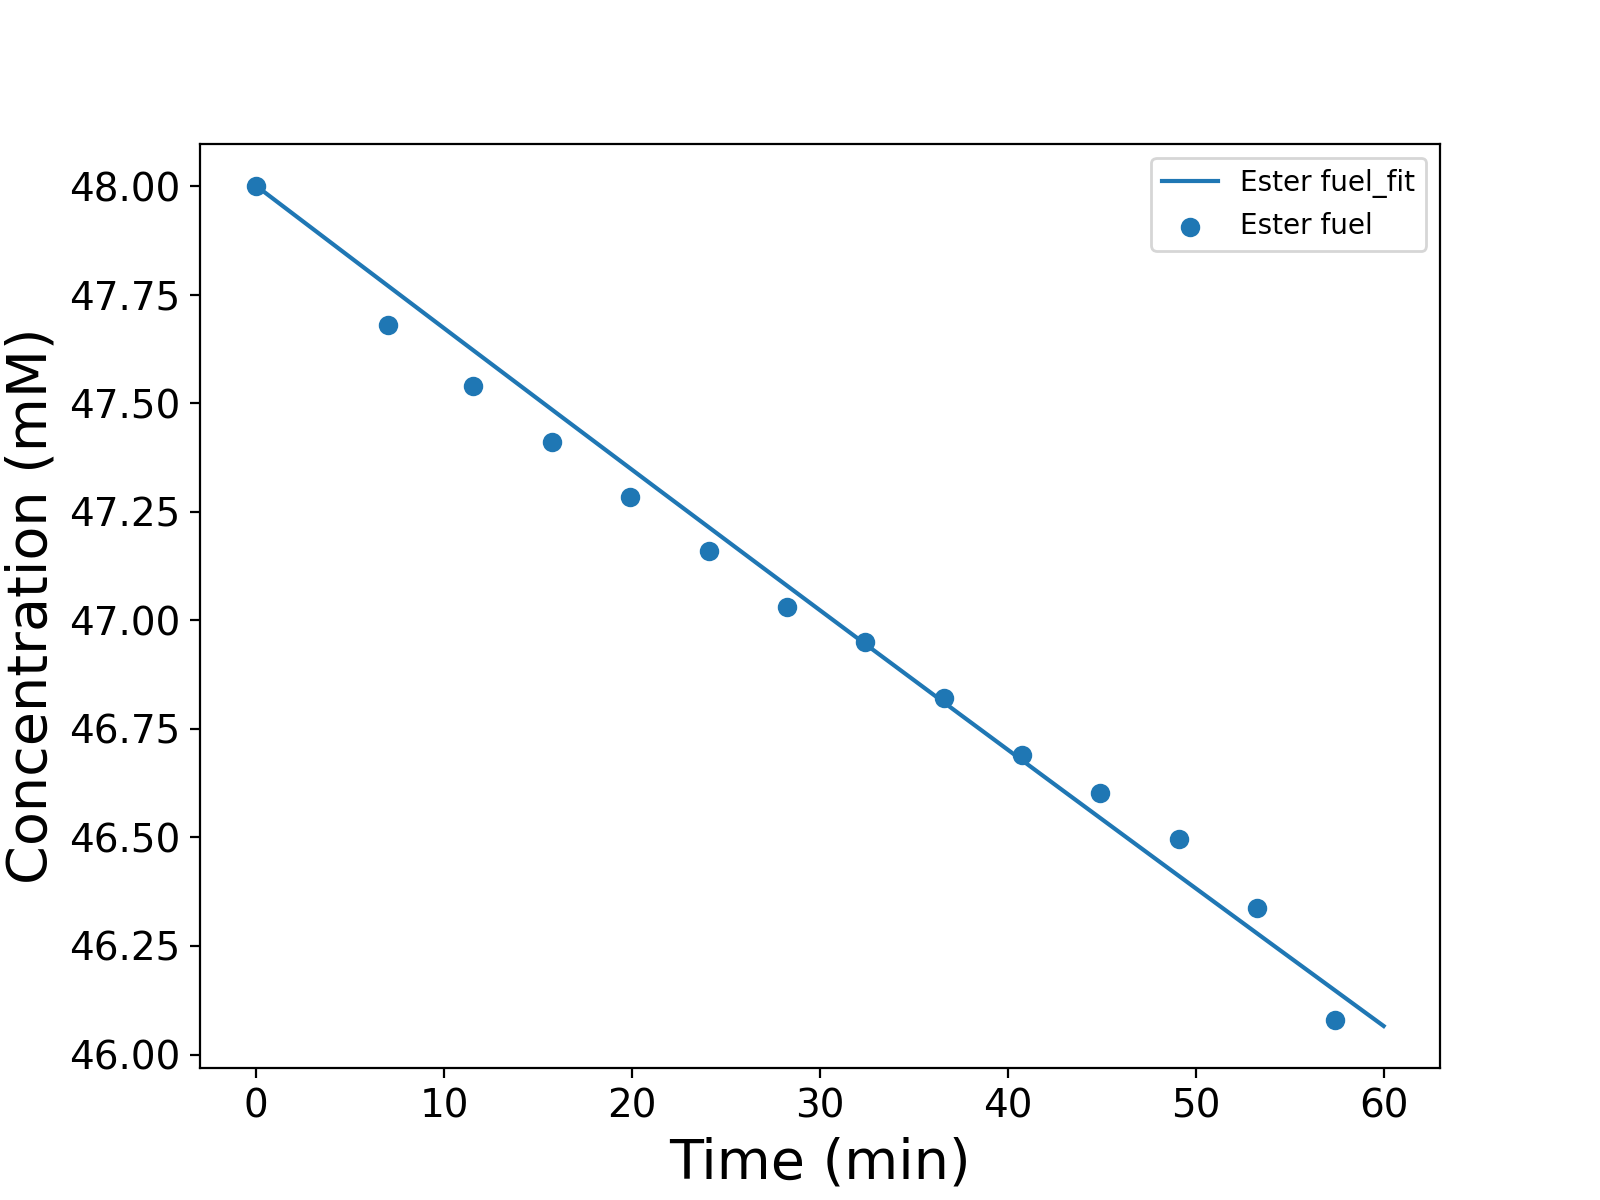

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-202-1 (pH 6.10) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [9]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-202-2.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Phenol waste,Unnamed: 8
0,-420,0.000000,1.0,48.000000,0.000,0.000000,0.000,0.000000,--
1,0,7.000000,78641.6,46.451742,1439.120,0.850054,1182.040,0.698203,NaN
2,272,11.533333,39747.5,45.860628,994.021,1.146900,860.177,0.992471,NaN
3,522,15.700000,39339.6,45.917354,695.373,0.811642,1088.930,1.271004,NaN
4,772,19.866667,38962.1,45.455719,834.455,0.973529,1346.360,1.570751,NaN


In [10]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Waste,Unnamed: 8
0,-420,0.000000,1.0,48.000000,0.000,0.000000,0.000,0.000000,--
1,0,7.000000,78641.6,46.451742,1439.120,0.850054,1182.040,0.698203,NaN
2,272,11.533333,39747.5,45.860628,994.021,1.146900,860.177,0.992471,NaN
3,522,15.700000,39339.6,45.917354,695.373,0.811642,1088.930,1.271004,NaN
4,772,19.866667,38962.1,45.455719,834.455,0.973529,1346.360,1.570751,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        2.462960e-03 8.043405e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   9
Objective              <symfit.core.objectives.LeastSquares object at 0x7fd4c9877b80>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fd4c98779a0>

Goodness of fit qualifiers:
chi_squared            2.6171370686117807
objective_value        1.3085685343058904
r_squared              0.9349308639622547


<IPython.core.display.Javascript object>


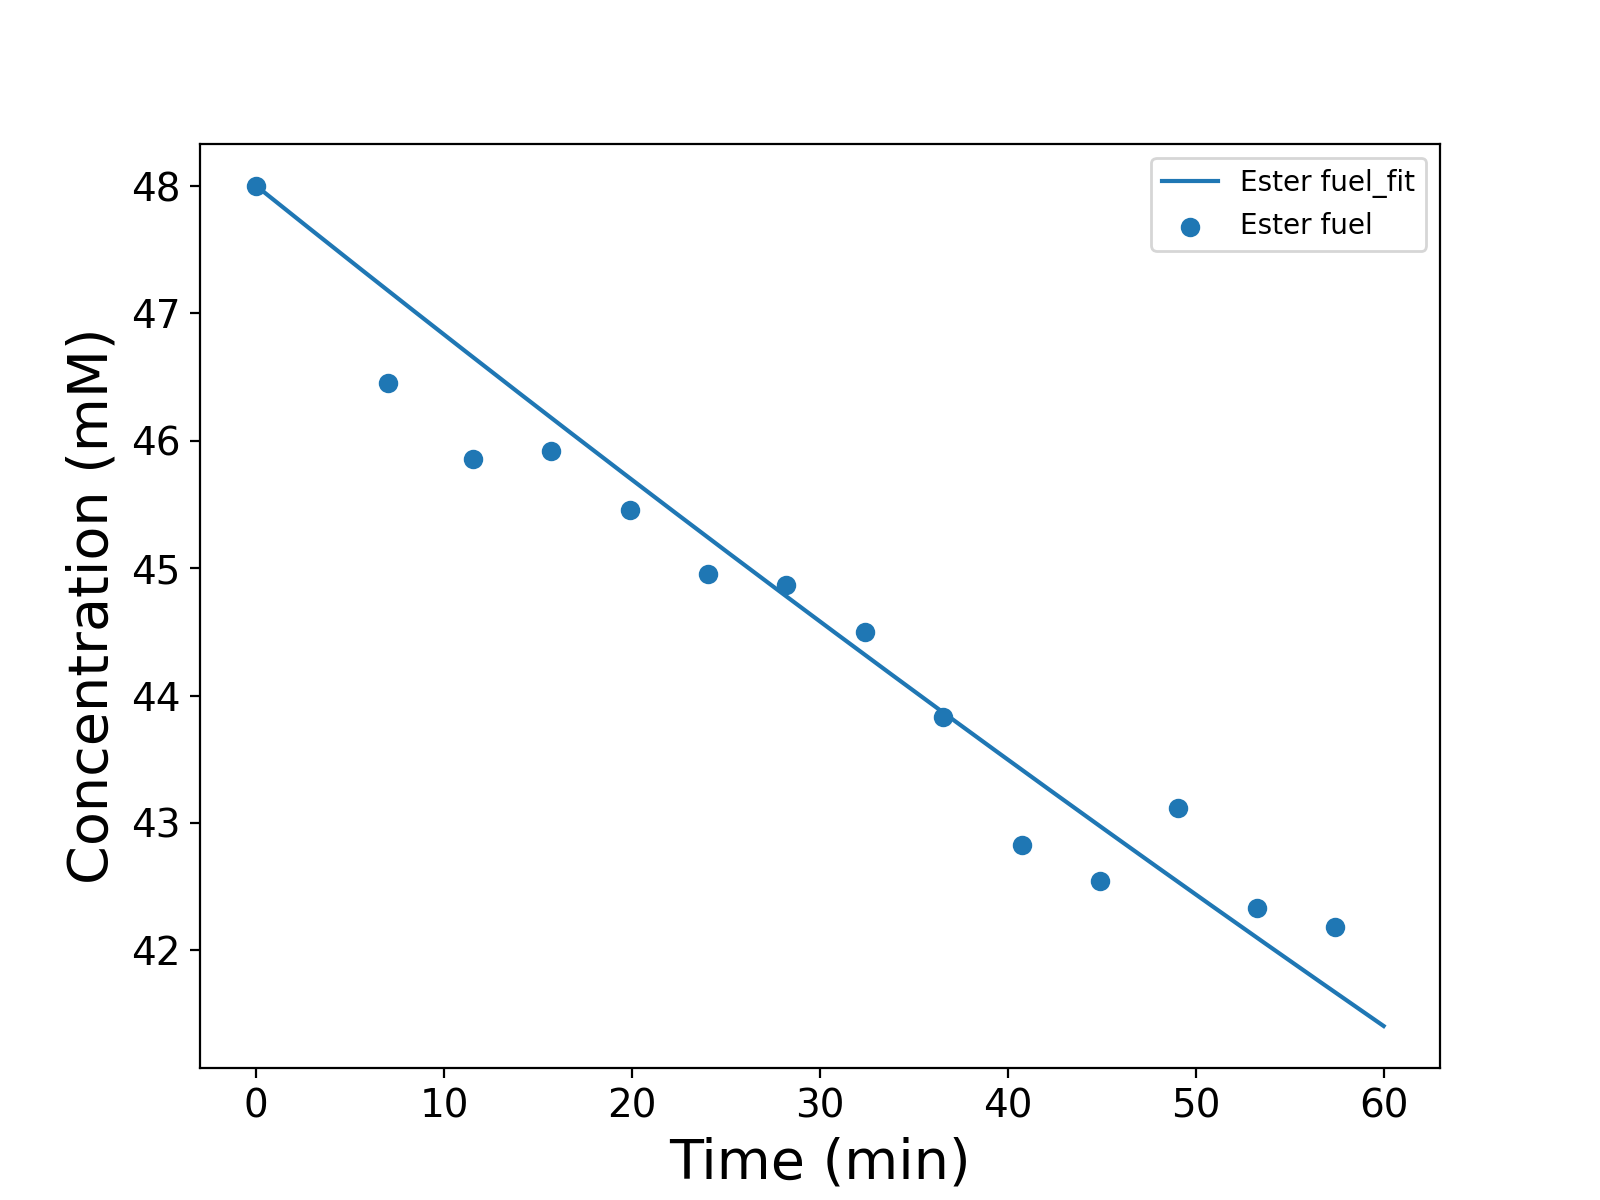

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-202-2 (pH 6.55) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [12]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-202-3 again.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Phenol waste,Unnamed: 8
0,-360,0.000000,1.0,48.000000,0.00,0.000000,0.00,0.000000,--
1,0,6.000000,71502.0,45.872598,1284.30,0.823951,2031.70,1.303451,NaN
2,285,10.750000,36824.3,44.368865,1240.69,1.494883,1773.00,2.136252,NaN
3,535,14.916667,35772.3,43.800693,1102.92,1.350449,2326.68,2.848858,NaN
4,786,19.100000,34856.3,42.742637,1363.97,1.672572,2923.37,3.584791,NaN


In [13]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Waste,Unnamed: 8
0,-360,0.000000,1.0,48.000000,0.00,0.000000,0.00,0.000000,--
1,0,6.000000,71502.0,45.872598,1284.30,0.823951,2031.70,1.303451,NaN
2,285,10.750000,36824.3,44.368865,1240.69,1.494883,1773.00,2.136252,NaN
3,535,14.916667,35772.3,43.800693,1102.92,1.350449,2326.68,2.848858,NaN
4,786,19.100000,34856.3,42.742637,1363.97,1.672572,2923.37,3.584791,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        6.152694e-03 8.247748e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   5
Objective              <symfit.core.objectives.LeastSquares object at 0x7fd49804e550>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fd49804eeb0>

Goodness of fit qualifiers:
chi_squared            1.9331864011027426
objective_value        0.9665932005513713
r_squared              0.9917720803785849


<IPython.core.display.Javascript object>


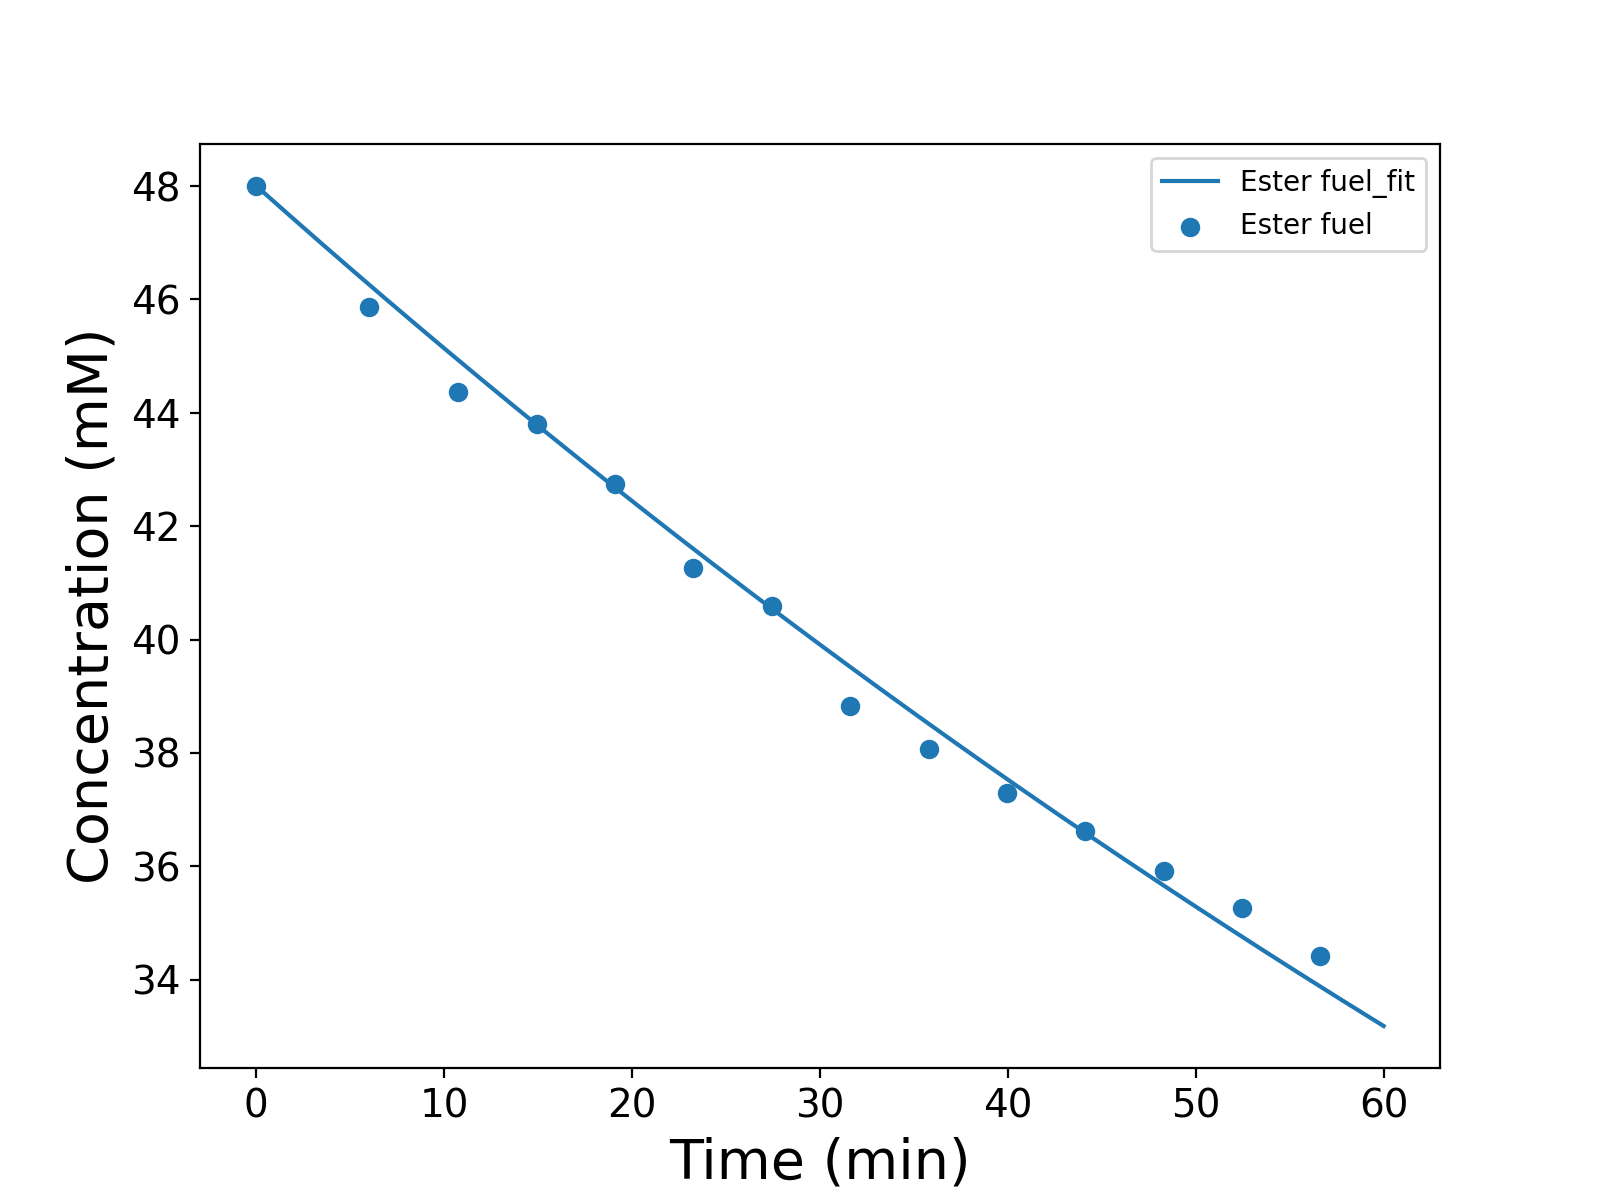

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-202-3 again (pH 7.00) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [15]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-202-4.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Phenol waste
0,-360,0.000000,1.0,48.000000,0.00,0.000000,0.0,0.000000
1,0,6.000000,46426.5,34.861949,5386.16,4.044501,12110.1,9.093550
2,272,10.533333,21826.4,27.373139,4637.35,5.815839,11809.8,14.811022
3,522,14.700000,16940.8,21.462904,5517.59,6.990432,15428.3,19.546664
4,772,18.866667,12849.4,16.183527,6439.15,8.109963,18822.5,23.706510


In [16]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Waste
0,-360,0.000000,1.0,48.000000,0.00,0.000000,0.0,0.000000
1,0,6.000000,46426.5,34.861949,5386.16,4.044501,12110.1,9.093550
2,272,10.533333,21826.4,27.373139,4637.35,5.815839,11809.8,14.811022
3,522,14.700000,16940.8,21.462904,5517.59,6.990432,15428.3,19.546664
4,772,18.866667,12849.4,16.183527,6439.15,8.109963,18822.5,23.706510


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        5.367226e-02 8.497414e-04
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   6
Objective              <symfit.core.objectives.LeastSquares object at 0x7fd4dcbf0d60>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fd4dcbf0460>

Goodness of fit qualifiers:
chi_squared            7.849344627222645
objective_value        3.9246723136113224
r_squared              0.9966185989628783


<IPython.core.display.Javascript object>


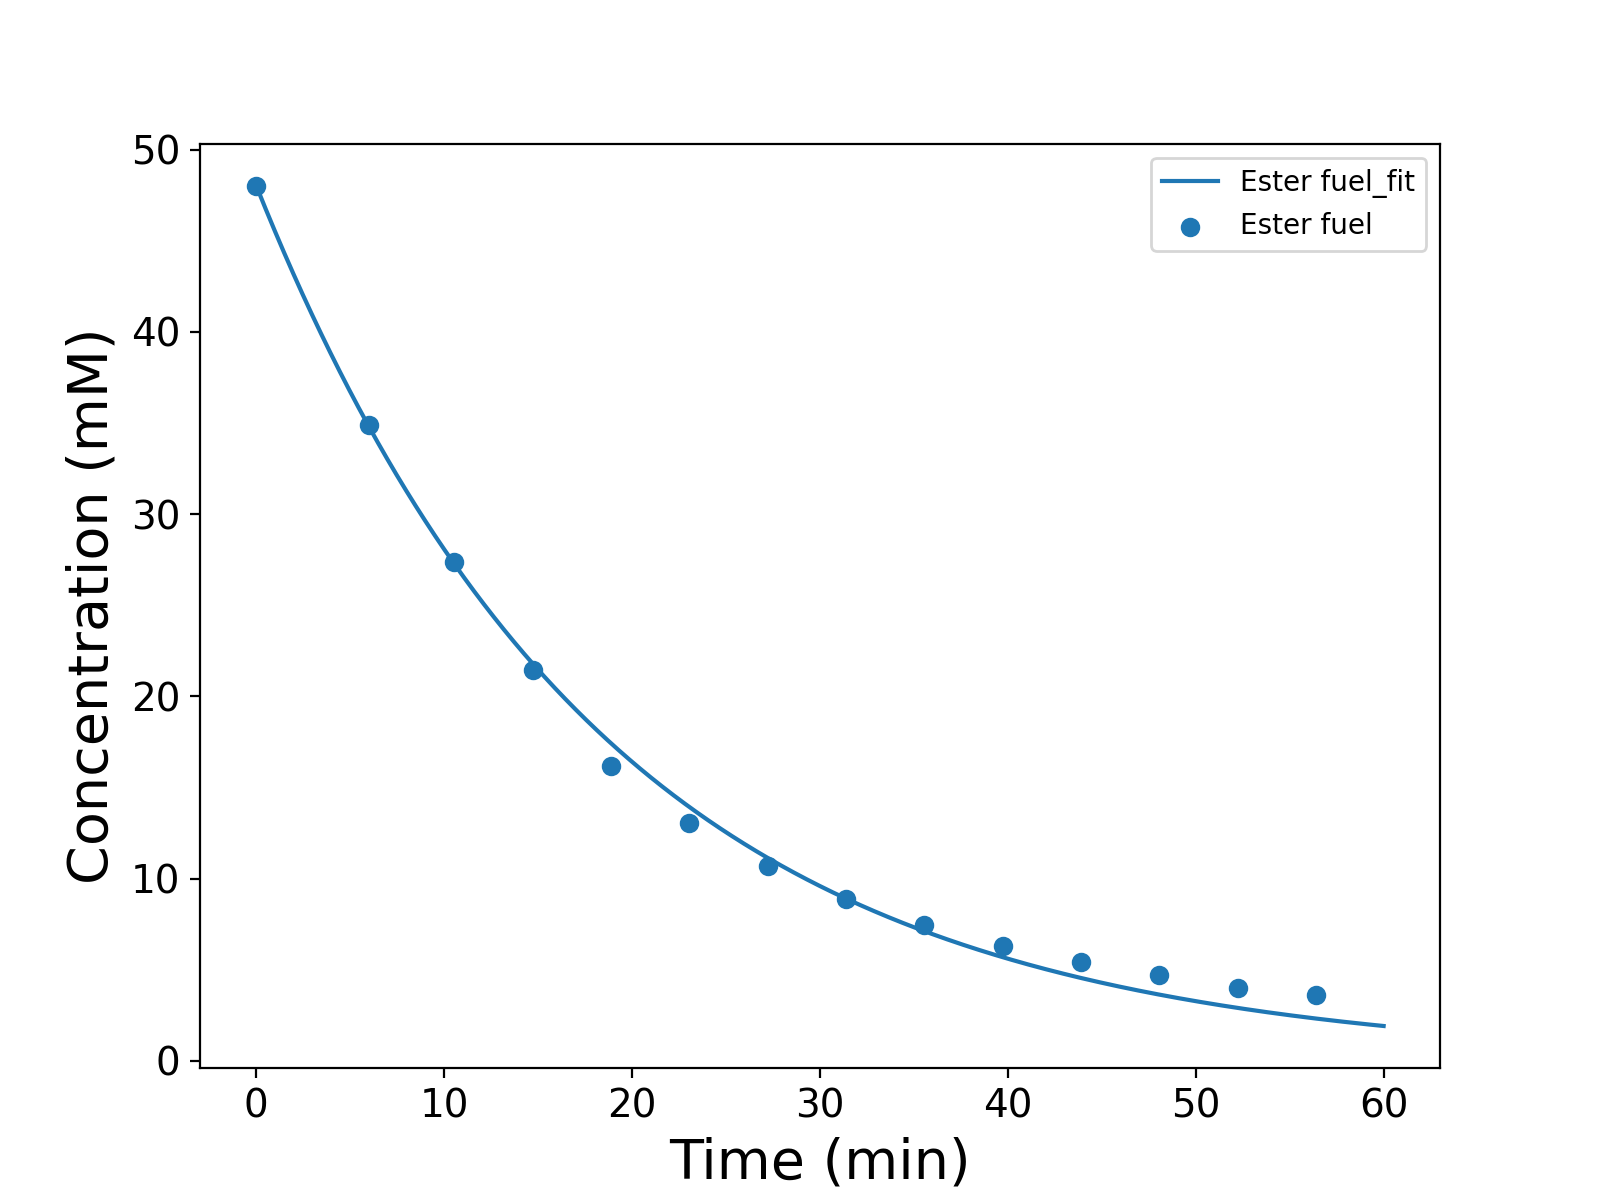

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-202-4 (pH 7.90) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()